## 1. Standard Import

In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

In [4]:
import matplotlib

In [5]:
matplotlib.__version__

'3.7.0'

In [6]:
torch.__version__

'1.12.0+cpu'

## 2. Create a transpose convolution instance

In [7]:
# Create a ConvTranspose2d class instance with parameters

# Parameters
inChans  = 3 # RGB channel
outChans = 15 # 15 different Kernels are required to achive this
krnSize  = 5 # should be an odd number
Stride   = 1
Padding  = 0

# Create an instance of transpose convolution (cf nn.Linear)
trans_conv = nn.ConvTranspose2d(in_channels=inChans,
                                out_channels=outChans,
                                kernel_size=krnSize,
                                stride=Stride,
                                padding=Padding)

# let's have a look at it
print(trans_conv)
print(' ')

# check out its weight tensor, what are the dimensions?
print( 'Size of weights: ' + str(trans_conv.weight.shape) )
print( 'Size of bias: ' +    str(trans_conv.bias.shape) )


ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


#### Plotting above kernels

In [8]:
trans_conv.weight

Parameter containing:
tensor([[[[ 0.0206, -0.0080, -0.0158,  0.0402,  0.0297],
          [ 0.0293, -0.0318,  0.0380, -0.0283,  0.0256],
          [ 0.0352,  0.0021,  0.0469, -0.0245,  0.0057],
          [ 0.0386, -0.0174,  0.0398, -0.0499, -0.0316],
          [-0.0254, -0.0415, -0.0469,  0.0179,  0.0443]],

         [[ 0.0122,  0.0287, -0.0107, -0.0026,  0.0186],
          [ 0.0458, -0.0048,  0.0464, -0.0427, -0.0164],
          [-0.0202, -0.0194, -0.0272, -0.0270, -0.0215],
          [ 0.0065,  0.0407,  0.0390, -0.0168, -0.0017],
          [ 0.0459, -0.0059,  0.0008,  0.0185, -0.0256]],

         [[ 0.0070,  0.0309, -0.0177, -0.0067,  0.0038],
          [ 0.0384,  0.0418,  0.0473, -0.0128, -0.0305],
          [-0.0001,  0.0509, -0.0438,  0.0111,  0.0216],
          [-0.0298, -0.0099,  0.0336,  0.0403,  0.0424],
          [-0.0199,  0.0496, -0.0267, -0.0377, -0.0009]],

         ...,

         [[ 0.0065, -0.0345,  0.0152, -0.0349, -0.0075],
          [ 0.0136, -0.0383,  0.0157, -0.0313

In [9]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

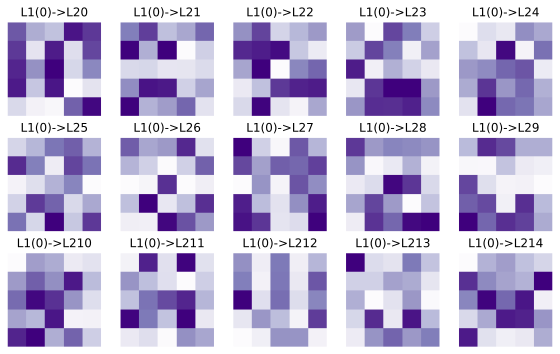

In [10]:
# What do these kernels look like?

fig,axs = plt.subplots(3,5,figsize=(8,5), dpi=135)

for i,ax in enumerate(axs.flatten()):
    
    # Size of weights: torch.Size([3, 15, 5, 5]
    ax.imshow(torch.squeeze(trans_conv.weight[0,i,:,:]).detach(),cmap='Purples')
    ax.set_title(f'L1(0)->L2{i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 3. Convolve with an Image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


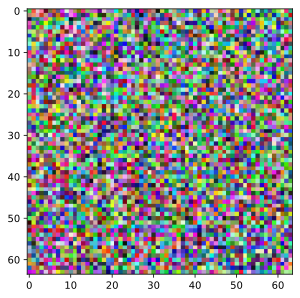

In [11]:
# size of the image (N, RGB, width, height)
imsize = (1,3,64,64)

img = torch.rand(imsize)

# pytorch wants channels first(RGB, height, width), but 
# matplotlib wants channels last(height, width,RGB).

# therefore, tensors must be permuted to visualize using matplotlib
# 2 : index number of height
# 3 : index number of width
# 1 : index number of RGB channel
# 0 : index number of batch size
img2view = img.permute(2,3,1,0).numpy()

print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [12]:
# Convolve the image with the filter bank (set of 'outChans' kernels)
convRes = trans_conv(img)

print("Original Image : ",img.shape)
print("Transposed Convolved Image : ",convRes.shape)

Original Image :  torch.Size([1, 3, 64, 64])
Transposed Convolved Image :  torch.Size([1, 15, 68, 68])


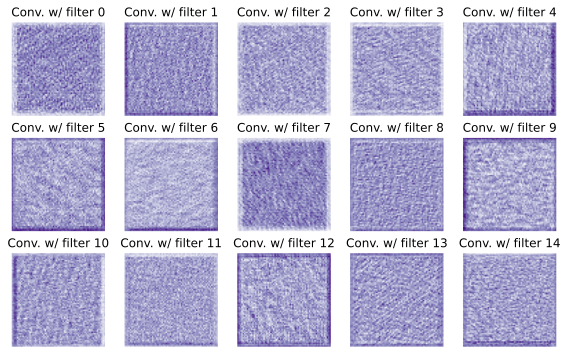

In [13]:
# What do the convolved images look like? (Hint: think of the bathtub picture.)

fig,axs = plt.subplots(3,5,figsize=(8,5), dpi=135)

for i,ax in enumerate(axs.flatten()):

    # extract this "layer" of the convolution result
    # size  of convolved image :  torch.Size([1, 15, 68, 68])
    I = torch.squeeze(convRes[0,i,:,:]).detach()

    # and visualize it
    ax.imshow(I,cmap='Purples')
    ax.set_title('Conv. w/ filter %s'%i)
    ax.axis('off')

plt.tight_layout()
plt.show()

#### conclusion :  
- Edge effect is seen in above convolved images.